NOTE: The commented code blocks are only supposed to be run once and were made for my convinience. Hence Please do not run it else the dataset would be messed up. 
THANKYOU !

In [1]:
import pandas as pd
import os
import librosa
import numpy as np
import soundfile as sf
import random
import matplotlib.pyplot as plt
import IPython.display as ipd
import shutil

In [2]:
# labels=["angry","disgust","fear","happy","neutral","sad","surprise"]

Renaming files in each category (Only needed once)


In [3]:
# orig_path="D:/Projects/MoodMate/speech_dataset"
# categories=os.listdir(orig_path)

# for i in categories:
#     path=""
#     count=1
#     path=orig_path + "/" + i
#     samples=os.listdir(path)
#     for j in samples:
#         path=orig_path + "/" + i
#         new_path=""
#         new_path=path + "/" + i + "_" + str(count) + ".wav"
#         path=path + "/" + j
#         os.rename(path,new_path)
#         count+=1

Code to augment the sound data


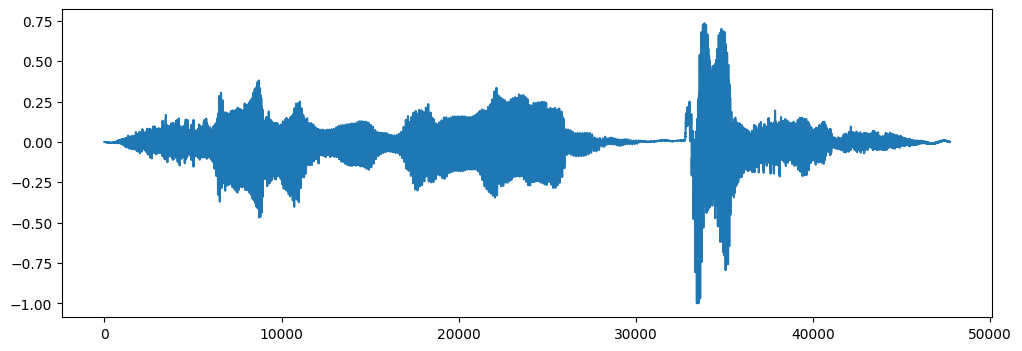

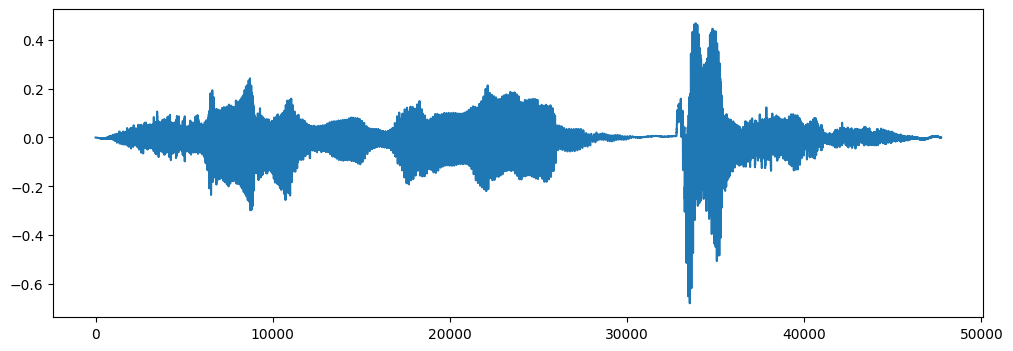

In [4]:
signal1,sr1 = librosa.load("sudi.wav")
signal2,sr2 = librosa.load("output.wav")
plt.figure(figsize=(12, 4))
plt.plot(signal1)

plt.figure(figsize=(12, 4))
plt.plot(signal2)

In [5]:
signal1,sr1 = librosa.load("anger.wav")
ipd.Audio("sudi.wav")


Segregating RAVDESS dataset into seperate categories 
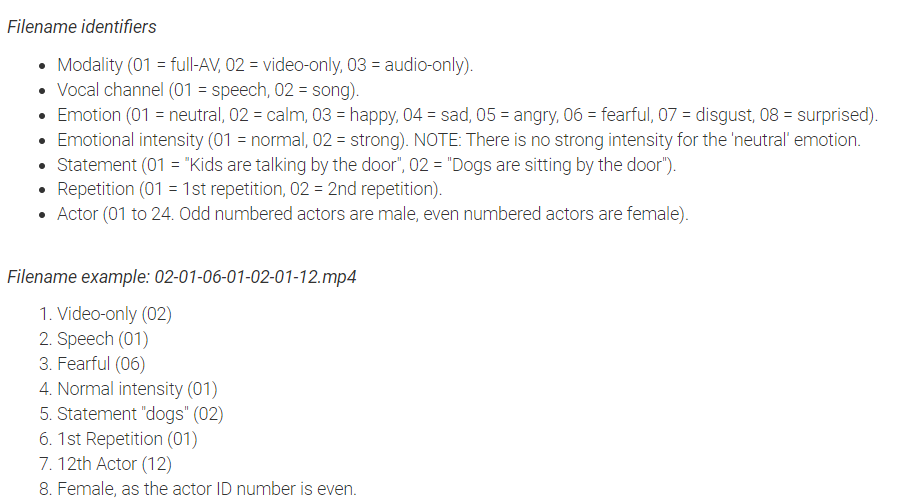

WARNING: Do this only if you have new data else the data will be duplicated with different name


In [6]:
# # Segregating the Audio files by their respective categories

# 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

# path="D:/Projects/MoodMate/RAVDESS"
# target_path="D:/Projects/MoodMate/speech_dataset"
# split_list=[]

# for actor in os.listdir(path):
#     for aud in os.listdir(path +"/" + actor):
#         split_list=aud.split("-")
#         emo=split_list[2]
#         if emo=="01":
#             emo_type="neutral"
#             # folder_length=len(os.listdir(target_path + "/" + emo_type))
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
#         if emo=="02":
#             continue
        
#         if emo=="03":
#             emo_type="happy"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
#         if emo=="04":
#             emo_type="sad"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
        
#         if emo=="05":
#             emo_type="angry"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
#         if emo=="06":
#             emo_type="fear"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
#         if emo=="07":
#             emo_type="disgust"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
#         if emo=="08":
#             emo_type="surprise"
#             shutil.copy(path + "/" + actor+ "/"+ aud , target_path+ "/" + emo_type)
            
# # Renaming the Segregated Audio Files

# path="D:/Projects/MoodMate/RAVDESS"
# target_path="D:/Projects/MoodMate/speech_dataset"

# for emotion in os.listdir(target_path):
#     count=len(os.listdir(target_path + "/" + emotion)) +1  # We  put +1 so that the last filein the directoory doesnt get renamed
    
#     for audio in os.listdir(target_path+ "/" + emotion):
#         try:
#             os.rename(target_path+ "/" + emotion + "/" +audio ,target_path+ "/" + emotion + "/" + emotion + "_"+ str(count)+ ".wav")
#             count+=1
#         except:
#             pass
                    
        

Code to delete content from files 
WARNING: Do this only agar koi galti hui hogi. Else all the data will be deleted

In [7]:
# path="D:/Projects/MoodMate/RAVDESS"
# target_path="D:/Projects/MoodMate/RAVDESS_seg"

# for emotion in os.listdir(target_path):
#     for i in os.listdir(target_path + "/" + emotion):
#         os.remove(target_path + "/" + emotion + "/" +i)

Renaming the audios in the dataset directory if the named numbers arent in the proper order.

In [8]:
# path= "D:/Projects/MoodMate/speech_dataset"

# for mood in os.listdir(path):
#     count =1
#     for audio in os.listdir(path + "/" + mood):
#         try:
#             os.rename(path+ "/" + mood + "/" +audio ,path+ "/" + mood + "/" + mood + "_"+ str(count)+ ".wav")
#             count+=1
#         except:
#             pass

Sound data augmentation

In [ ]:

def time_shift(signal, sr, shift_ms=500):
    shift_samples = int(shift_ms * sr / 1000)
    shifted_signal = np.roll(signal, shift_samples)
    shifted_signal[:shift_samples] = 0  
    return shifted_signal

def pitch_shift(signal, sr, n_steps=[-2, -1, 1, 2]):
    shifted_signal = librosa.effects.pitch_shift(y=signal, sr=sr, n_steps=n_steps)
    return shifted_signal

def white_noiser(signal,noise_factor=random.uniform(0.01, 0.1)): #0.3
        noise = np.random.normal(0,signal.std(),signal.size)
        augmented_signal = signal + noise * noise_factor
        return augmented_signal

def invert_polarity(signal):
        return signal * -1.5

def random_gain(signal,min_gain=0.15,max_gain=1.7):
        gain_factor = random.uniform(min_gain,max_gain)
        return signal*gain_factor       


def time_stretch(signal, rate):
  
    stretched_audio = librosa.effects.time_stretch(signal,rate=rate)
    return stretched_audio
       
        

Code For calling the augmenting functions and saving the audio files in the respective directories


In [11]:
path = "D:/Projects/MoodMate/speech_dataset"

for emotion in os.listdir(path):
    count = len(os.listdir(path + "/" + emotion)) + 1
    
    for audio in os.listdir(path + "/" + emotion):
        # Load the audio and ensure it's mono
        signal, sr = librosa.load(path + "/" + emotion + "/" + audio, mono=True)
        
        # White Noise Augmentation
        augmented_signal_1 = white_noiser(signal, round(random.uniform(0.1, 0.34), 2))
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_1, sr)
        count += 1
        
        # Polarity Inversion
        augmented_signal_2 = invert_polarity(signal)
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_2, sr)
        count += 1
        
        # Random Gain
        augmented_signal_3 = random_gain(signal)
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_3, sr)
        count += 1
        
        # Time Stretch
        augmented_signal_4 = time_stretch(signal, round(random.uniform(0.6, 2), 2))
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_4, sr)
        count += 1

        # Time Shift
        augmented_signal_5 = time_shift(signal, sr)
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_5, sr)
        count += 1
        
        # Pitch Shift
        augmented_signal_6 = pitch_shift(signal, sr)
        sf.write(path + "/" + emotion + "/" + emotion + "_" + str(count) + ".wav", augmented_signal_6, sr)
        count += 1
